## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [3]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "5"

In [28]:
train, test = keras.datasets.cifar10.load_data()

In [29]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [30]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [41]:
"""Code Here
建立你的神經網路
"""
  
def build_mlp(input_shape, output_units=10, num_neurons=[512, 512, 256, 256, 256, 128, 128, 128, 64, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(rate = 0.3)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [42]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               6579

In [38]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [39]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [26]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 158us/step - loss: 2.1761 - accuracy: 0.1628 - val_loss: 1.9577 - val_accuracy: 0.2482
Epoch 2/100
50000/50000 [==============================] - 8s 155us/step - loss: 1.9644 - accuracy: 0.2355 - val_loss: 1.9056 - val_accuracy: 0.2653
Epoch 3/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.8877 - accuracy: 0.2602 - val_loss: 1.8492 - val_accuracy: 0.2956
Epoch 4/100
50000/50000 [==============================] - 8s 159us/step - loss: 1.8380 - accuracy: 0.2856 - val_loss: 1.8327 - val_accuracy: 0.3226
Epoch 5/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.7887 - accuracy: 0.3152 - val_loss: 1.7548 - val_accuracy: 0.3387
Epoch 6/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.7458 - accuracy: 0.3347 - val_loss: 1.7031 - val_accuracy: 0.3559
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 11s 225us/step - loss: 0.9908 - accuracy: 0.6478 - val_loss: 1.5246 - val_accuracy: 0.5020
Epoch 56/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.9796 - accuracy: 0.6541 - val_loss: 1.5054 - val_accuracy: 0.5078
Epoch 57/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.9810 - accuracy: 0.6507 - val_loss: 1.5211 - val_accuracy: 0.5113
Epoch 58/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.9793 - accuracy: 0.6549 - val_loss: 1.5116 - val_accuracy: 0.5073
Epoch 59/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.9884 - accuracy: 0.6532 - val_loss: 1.5186 - val_accuracy: 0.5092
Epoch 60/100
50000/50000 [==============================] - 11s 215us/step - loss: 0.9524 - accuracy: 0.6624 - val_loss: 1.5343 - val_accuracy: 0.5189
Epoch 61/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.9735 - accuracy: 0.658

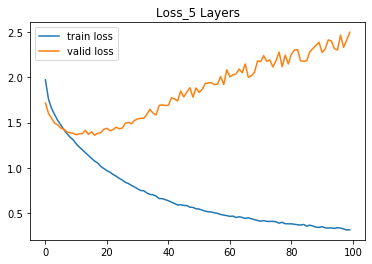

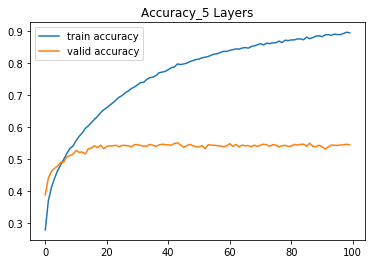

In [16]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss_5 Layers")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy_5 Layers")
plt.show()

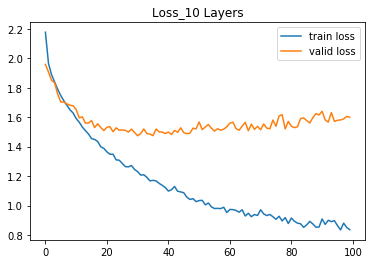

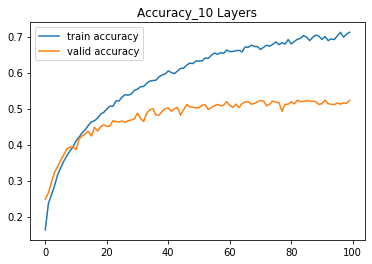

In [27]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss_10 Layers")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy_10 Layers")
plt.show()

## 結論 : 10層的驗證準確度與5層相差不多, 但5層經過100次的迭代後仍未收斂. 另外, 有設dropout  機制的模型表現較佳.